<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Finance with Python

**Chapter 02 &mdash; Two State Economy**

In [3]:
%matplotlib inline
import seaborn as sns
from pylab import mpl
mpl.rcParams['font.family'] = 'serif'

## Time

In [4]:
1 + 3

4

In [5]:
3 * 4

12

In [6]:
t = 0

In [7]:
t

0

In [8]:
t = 1

In [9]:
type(t)

int

## Currency

In [10]:
1 + 0.5

1.5

In [11]:
10.5 - 2

8.5

In [12]:
c = 2 + 0.75

In [13]:
c

2.75

In [14]:
type(c)

float

## Cash Flow

In [15]:
c0 = -9.5

In [16]:
c1 = 11.75

In [17]:
c = (c0, c1)

In [18]:
c

(-9.5, 11.75)

In [19]:
type(c)

tuple

In [20]:
c[0]

-9.5

In [21]:
c[1]

11.75

In [22]:
c = [c0, c1]

In [23]:
c

[-9.5, 11.75]

In [24]:
type(c)

list

In [25]:
c[0]

-9.5

In [26]:
c[1]

11.75

In [27]:
c[0] = 10

In [28]:
c

[10, 11.75]

## Present Value

In [29]:
i = 0.1

In [30]:
def D(c1):
    return c1 / (1 + i)

In [31]:
D(12.1)

10.999999999999998

In [32]:
D(11)

10.0

## Net Present Value

In [33]:
def NPV(c):
    return c[0] + D(c[1])

In [34]:
cA = (-10.5, 12.1)

In [35]:
cB = (-10.5, 11)

In [36]:
NPV(cA)

0.4999999999999982

In [37]:
NPV(cB)

-0.5

## Uncertainty 

In [38]:
import numpy as np

In [39]:
c0 = -10

In [40]:
c1 = np.array((20, 5))

In [41]:
type(c1)

numpy.ndarray

In [42]:
c1

array([20,  5])

In [43]:
c = (c0, c1)

In [44]:
c

(-10, array([20,  5]))

In [45]:
1.5 * c1 + 2

array([ 32. ,   9.5])

In [46]:
c1 + 1.5 * np.array((10, 4))

array([ 35.,  11.])

## Financial Assets

In [47]:
S0 = 10

In [48]:
S1 = np.array((12.5, 7.5))

In [49]:
S = (S0, S1)

In [50]:
S

(10, array([ 12.5,   7.5]))

In [51]:
S[0]

10

In [52]:
S[1][0]

12.5

In [53]:
S[1][1]

7.5

## Probability

In [54]:
p = 0.4

In [55]:
1 - p 

0.6

In [56]:
P = np.array((p, 1-p))

In [57]:
P

array([ 0.4,  0.6])

## Expectation

In [58]:
P

array([ 0.4,  0.6])

In [59]:
S0 = 10

In [60]:
S1 = np.array((20, 5))

In [61]:
np.dot(P, S1)

11.0

## Expected Return

In [62]:
def ER(x0, x1):
    return np.dot(P, x1) - x0

In [63]:
ER(S0, S1)

1.0

In [64]:
def mu(x0, x1):
    return (np.dot(P, x1) - x0) / x0

In [65]:
mu(S0, S1)

0.10000000000000001

## Volatility

In [66]:
def r(x0, x1):
    return (x1 - x0) / x0

In [67]:
r(S0, S1)

array([ 1. , -0.5])

In [68]:
mu = np.dot(P, r(S0, S1))

In [69]:
mu

0.10000000000000003

In [70]:
def sigma2(P, r, mu):
    return np.dot(P, (r - mu) ** 2)

In [71]:
sigma2(P, r(S0, S1), mu)

0.54000000000000004

In [72]:
def sigma(P, r, mu):
    return np.sqrt(np.dot(P, (r - mu) ** 2))

In [73]:
sigma(P, r(S0, S1), mu)

0.73484692283495345

## Contingent Claims

In [74]:
import numpy as np

In [75]:
S1 = np.arange(20)

In [76]:
S1

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [77]:
K = 10

In [78]:
C1 = np.maximum(S1 - K, 0)

In [79]:
C1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [80]:
from pylab import plt

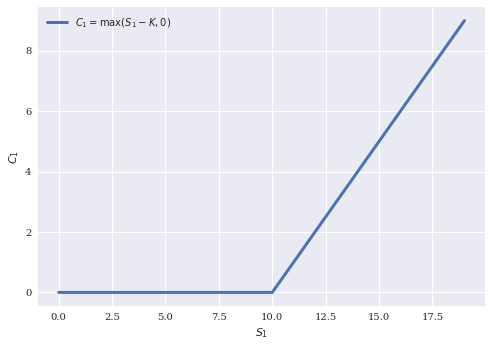

In [81]:
plt.plot(S1, C1, lw = 3.0, label='$C_1 = \max(S_1 - K, 0)$')
plt.legend(loc=0)
plt.xlabel('$S_1$')
plt.ylabel('$C_1$')
# plt.savefig('../../images/ch02/call_option.png');

## Replication

In [82]:
import numpy as np

In [83]:
B = (10, np.array((11, 11)))

In [84]:
S = (10, np.array((20, 5)))

In [85]:
M = np.array((B[1], S[1])).T

In [86]:
M

array([[11, 20],
       [11,  5]])

In [87]:
K = 15

In [88]:
C1 = np.maximum(S[1] - K, 0)

In [89]:
C1

array([5, 0])

In [90]:
phi = np.linalg.solve(M, C1)

In [91]:
phi

array([-0.15151515,  0.33333333])

## Arbitrage Pricing 

In [92]:
C0 = np.dot(phi, (B[0], S[0]))

In [93]:
C0

1.8181818181818181

In [94]:
10/3 - 50/33

1.8181818181818183

## Completeness

In [95]:
np.random.seed(100)

In [96]:
n = 1000

In [97]:
b = np.random.random(n)

In [98]:
b[:5]

array([ 0.54340494,  0.27836939,  0.42451759,  0.84477613,  0.00471886])

In [99]:
s = (1 - b)

In [100]:
s[:5]

array([ 0.45659506,  0.72163061,  0.57548241,  0.15522387,  0.99528114])

In [101]:
def portfolio(b, s):
    A = [b[i] * B[1] + s[i] * S[1] for i in range(n)]
    return np.array(A)

In [102]:
A = portfolio(b, s)

In [103]:
A[:3]

array([[ 15.10935552,   8.26042965],
       [ 17.49467553,   6.67021631],
       [ 16.17934168,   7.54710554]])

In [104]:
%matplotlib inline
from pylab import plt

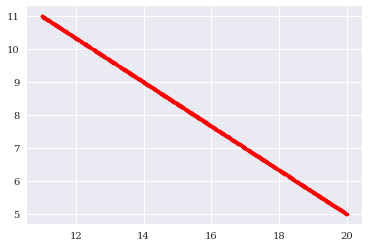

In [105]:
plt.plot(A[:, 0], A[:, 1], 'r.');
# plt.savefig('../../images/ch02/comp_01.png');

In [106]:
s = np.random.random(n)

In [107]:
b[:5] + s[:5]

array([ 0.57113722,  0.66060665,  1.3777685 ,  1.06697466,  0.30984498])

In [108]:
A = portfolio(b, s)

In [109]:
%matplotlib inline
from pylab import plt

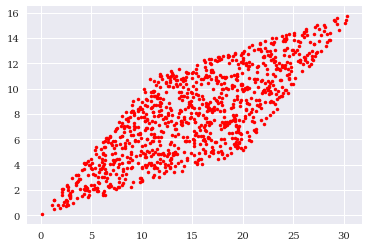

In [110]:
plt.plot(A[:, 0], A[:, 1], 'r.')
# plt.savefig('../../images/ch02/comp_02.png');

In [111]:
b = np.random.standard_normal(n)

In [112]:
s = np.random.standard_normal(n)

In [113]:
b[:5] + s[:5]

array([-0.66775696,  1.60724747,  2.65416419,  1.20646469, -0.12829258])

In [114]:
A = portfolio(b, s)

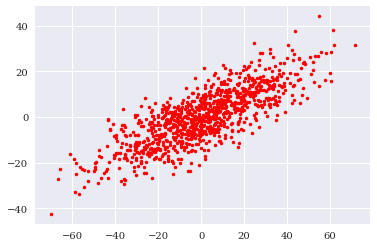

In [115]:
plt.plot(A[:, 0], A[:, 1], 'r.')
# plt.savefig('../../images/ch02/comp_03.png');

## Martingale Measure

In [116]:
i = (B[1][0] - B[0]) / B[0]

In [117]:
i

0.10000000000000001

In [118]:
q = (S[0] * (1 + i) - S[1][1]) / (S[1][0] - S[1][1])

In [119]:
q

0.40000000000000002

## Risk-Neutral Pricing

In [120]:
Q = (q, 1-q)

In [121]:
np.dot(Q, C1) / (1 + i)

1.8181818181818181

## Mean-Variance Portfolios

In [122]:
import numpy as np

In [123]:
B = (10, np.array((11, 11)))

In [124]:
S = (10, np.array((20, 5)))

In [125]:
M = np.array((B[1], S[1])).T

In [126]:
M

array([[11, 20],
       [11,  5]])

In [127]:
M0 = np.array((B[0], S[0]))

In [128]:
R = M / M0 - 1

In [129]:
R

array([[ 0.1,  1. ],
       [ 0.1, -0.5]])

In [130]:
P = np.array((0.5, 0.5))

In [131]:
np.dot(P, R)

array([ 0.1 ,  0.25])

In [132]:
s = 0.55

In [133]:
phi = (1-s, s)

In [134]:
mu = np.dot(phi, np.dot(P, R))

In [135]:
mu

0.18250000000000005

In [136]:
sigma = s * R[:, 1].std()

In [137]:
sigma

0.41250000000000003

In [138]:
values = np.linspace(0, 1, 25)

In [139]:
mu = [np.dot(((1-s), s), np.dot(P, R))
      for s in values]

In [140]:
sigma = [s * R[:, 1].std()
         for s in values]

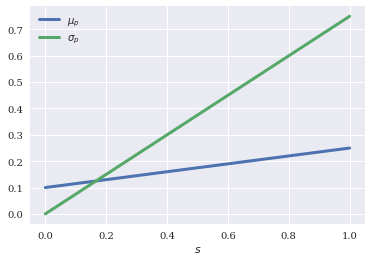

In [141]:
plt.plot(values, mu, lw = 3.0, label='$\mu_p$')
plt.plot(values, sigma, lw = 3.0, label='$\sigma_p$')
plt.legend(loc=0)
plt.xlabel('$s$')
# plt.savefig('../../images/ch02/mvp_01.png');

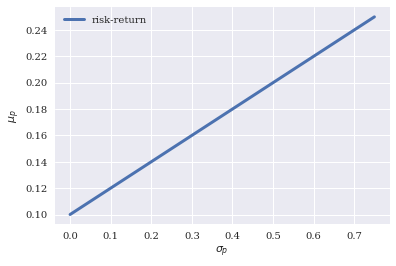

In [142]:
plt.plot(sigma, mu, lw = 3.0, label='risk-return')
plt.legend(loc=0)
plt.xlabel('$\sigma_p$')
plt.ylabel('$\mu_p$')
# plt.savefig('../../images/ch02/mvp_02.png');

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>

**Python Quant Platform** |
<a href="http://quant-platform.com">http://quant-platform.com</a>

**Python for Finance** |
<a href="http://python-for-finance.com" target="_blank">Python for Finance @ O'Reilly</a>

**Derivatives Analytics with Python** |
<a href="http://derivatives-analytics-with-python.com" target="_blank">Derivatives Analytics @ Wiley Finance</a>

**Listed Volatility and Variance Derivatives** |
<a href="http://lvvd.tpq.io" target="_blank">Listed VV Derivatives @ Wiley Finance</a>

**Python Training** |
<a href="http://training.tpq.io" target="_blank">Python for Finance University Certificate</a>